In [494]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandasql as pds
from matplotlib import pyplot
import datetime as dt

In [495]:
mynames=["Subject","Point FPSR","Name of the statistical factor","Importance of the statistical factor"]

In [496]:
df_2014=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2014.xlsx',names=mynames)
df_2014.insert(4,"Year","2014")
df_2015=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2015.xlsx',names=mynames)
df_2015.insert(4,"Year","2015")
df_2016=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2016.xlsx',names=mynames)
df_2016.insert(4,"Year","2016")
df_2017=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2017.xlsx',names=mynames)
df_2017.insert(4,"Year","2017")
df_2018=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2018.xlsx',names=mynames)
df_2018.insert(4,"Year","2018")
df_2019=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2019.xlsx',names=mynames)
df_2019.insert(4,"Year","2019")
df_2020=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2020.xlsx',names=mynames)
df_2020.insert(4,"Year","2020")
df_2021=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2021.xlsx',names=mynames)
df_2021.insert(4,"Year","2021")
df_2022=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2022.xlsx',names=mynames)
df_2022.insert(4,"Year","2022")
df_2023=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\missing people 2023.xlsx',names=mynames)
df_2023.insert(4,"Year","2023")

In [497]:
df=pd.concat(
    [df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023])
df

,Subject,Point FPSR,Name of the statistical factor,Importance of the statistical factor,Year
0,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2014
1,Subject,Point FPSR,Name of the statistical factor,Importance of the statistical factor,2014
2,Центральный фед.округ,3_11,Всего разыскивалось лиц,47877,2014
3,Центральный фед.округ,3_11,"Всего разыскивалось лиц, в том числе скрывшихс...",23445,2014
4,Центральный фед.округ,3_11,"Всего разыскивалось лиц, в том числе лиц, проп...",22939,2014
...,...,...,...,...,...
977,Всего по России,3_11,Установлено лиц из числа находившихся в розыск...,6489,2023
978,Всего по России,3_11,Всего дел по установлению личности граждан по ...,13904,2023
979,Всего по России,3_11,Всего прекращено дел в связи с установлением л...,1600,2023
980,Всего по России,3_11,Количество (остаток) неразысканных преступнико...,"-36,15937638",2023


In [498]:
translation=pd.read_excel('C:\\Users\\darko\\Python\\DataSets\\Missing People in Russia\\translate1.xlsx',names = ['ru', 'en'])
translation

,ru,en
0,Установлено лиц из числа находившихся в розыск...,Identified persons from among those who were w...
1,Всего дел по установлению личности граждан по ...,Total cases on the identification of citizens...
2,"Всего разыскивалось лиц, в том числе скрывшихс...","Total wanted persons, including those who dis..."
3,Установлено лиц из числа находившихся в розыск...,Identified persons from among the wanted perso...
4,Всего разыскивалось лиц ...,Total wanted persons.
...,...,...
105,Чеченская Республика,Chechen Republic
106,Чувашская Республика,Chuvash Republic
107,Чукотский АО,Chukotsky Autonom...
108,Южный фед. Округ,Southern fed. district


In [499]:
translation["ru"] = translation["ru"].apply(lambda x: x.strip())
translation["en"] = translation["en"].apply(lambda x: x.strip())

In [500]:
df["Subject"] = df["Subject"].apply(lambda x: x.strip())
df = pd.merge(df, translation, left_on="Subject", right_on='ru')
df.rename(columns={"en":"Subject (en)"},inplace=True)
df.drop("ru", axis=1, inplace=True)
df.head()

,Subject,Point FPSR,Name of the statistical factor,Importance of the statistical factor,Year,Subject (en)
0,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2014,Subject
1,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2015,Subject
2,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2016,Subject
3,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2017,Subject
4,Субъект,Пункт ФПСР,Наименование статистического показателя,Значение статистического показателя (за январь...,2018,Subject


In [501]:
df = pd.merge(df, translation, left_on="Name of the statistical factor", right_on="ru")
df.drop("ru", axis=1, inplace=True)

df.rename(columns={"en":"Name of the statistical factor (en)"},inplace=True)
df.head()

,Subject,Point FPSR,Name of the statistical factor,Importance of the statistical factor,Year,Subject (en),Name of the statistical factor (en)
0,Центральный фед.округ,3_11,Всего разыскивалось лиц,47877,2014,Central Federal District,Total wanted persons.
1,Центральный фед.округ,3_11,Всего разыскивалось лиц,45291,2015,Central Federal District,Total wanted persons.
2,Центральный фед.округ,3_11,Всего разыскивалось лиц,43793,2016,Central Federal District,Total wanted persons.
3,Центральный фед.округ,3_11,Всего разыскивалось лиц,42356,2017,Central Federal District,Total wanted persons.
4,Центральный фед.округ,3_11,Всего разыскивалось лиц,39713,2018,Central Federal District,Total wanted persons.


In [502]:
df.drop(["Subject","Point FPSR","Name of the statistical factor"], axis=1, inplace=True)
df.head()

,Importance of the statistical factor,Year,Subject (en),Name of the statistical factor (en)
0,47877,2014,Central Federal District,Total wanted persons.
1,45291,2015,Central Federal District,Total wanted persons.
2,43793,2016,Central Federal District,Total wanted persons.
3,42356,2017,Central Federal District,Total wanted persons.
4,39713,2018,Central Federal District,Total wanted persons.


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Importance of the statistical factor  8116 non-null   object
 1   Year                                  8116 non-null   object
 2   Subject (en)                          8116 non-null   object
 3   Name of the statistical factor (en)   8116 non-null   object
dtypes: object(4)
memory usage: 253.8+ KB


In [504]:
df["Subject (en)"].nunique()

94

In [505]:
df["Subject (en)"].unique()

array(['Central Federal District', 'Belgorod region', 'Bryansk Region',
       'Vladimir region', 'Voronezh region', 'Ivanovo region',
       'Kaluga region', 'Kostroma region', 'Kursk Region',
       'Lipetsk Region', 'Moscow', 'Moscow region', 'Oryol Region',
       'Ryazan Oblast', 'Smolensk region', 'Tambov Region', 'Tver region',
       'Tula region', 'Yaroslavl region', 'Northwest federal district',
       'The Republic of Karelia', 'Komi Republic',
       'Arkhangelsk region (with AO)', 'Nenets Autonomous Area',
       'Vologda Region', 'Kaliningrad region',
       'GUVD of St. Petersburg. and Len.obl', 'Leningrad region',
       'Saint Petersburg', 'Murmansk region', 'Novgorod region',
       'Pskov region', 'Stavropol region', 'The Republic of Ingushetia',
       'The Republic of Dagestan', 'Kabardino-Balkar Republic',
       'Rep. North Osetia - Alanya', 'Karachay-Cherkessia Republic',
       'Chechen Republic', 'Krasnodar region', 'Astrakhan Region',
       'Volgograd region

In [506]:
df["Name of the statistical factor (en)"].unique()

array(['Total wanted persons.',
       'Total wanted persons, including those who disappeared from the bodies of inquiry, investigation, court.',
       'Total wanted persons, including those missing',
       'Identified persons from the number of wanted persons',
       'Identified persons from among those who were wanted, including those who disappeared from the bodies of inquiry, investigation, court.',
       'Identified persons from among the wanted persons, including those missing.',
       'Total cases on the identification of citizens on unidentified corpses that were on the register.',
       'Total discontinued cases in connection with the identification of the person',
       'Number (balance) of unresolved criminals against',
       'Number (balance) of unreturned missing persons in relation to 2011 (%)'],
      dtype=object)

In [507]:
df_Missing_and_found=df["Name of the statistical factor (en)"].isin(["Total wanted persons, including those missing","Identified persons from among the wanted persons, including those missing."])
df_Missing_and_found=df[df_Missing_and_found]
df_Missing_and_found

,Importance of the statistical factor,Year,Subject (en),Name of the statistical factor (en)
1842,22939,2014,Central Federal District,"Total wanted persons, including those missing"
1843,21712,2015,Central Federal District,"Total wanted persons, including those missing"
1844,20815,2016,Central Federal District,"Total wanted persons, including those missing"
1845,20006,2017,Central Federal District,"Total wanted persons, including those missing"
1846,17796,2018,Central Federal District,"Total wanted persons, including those missing"
...,...,...,...,...
5521,3,2019,city ​​of Sevastopol,Identified persons from among the wanted perso...
5522,1,2020,city ​​of Sevastopol,Identified persons from among the wanted perso...
5523,3,2021,city ​​of Sevastopol,Identified persons from among the wanted perso...
5524,3,2022,city ​​of Sevastopol,Identified persons from among the wanted perso...


In [508]:
df_Missing_and_found["Name of the statistical factor (en)"].unique()

array(['Total wanted persons, including those missing',
       'Identified persons from among the wanted persons, including those missing.'],
      dtype=object)

In [509]:
df_Missing_and_found.dtypes

Importance of the statistical factor    object
Year                                    object
Subject (en)                            object
Name of the statistical factor (en)     object
dtype: object

In [510]:
df_Missing_and_found["Importance of the statistical factor"]=df_Missing_and_found["Importance of the statistical factor"].astype(int)
df_Missing_and_found.head()

C:\Users\darko\AppData\Local\Temp\ipykernel_20372\4253634927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Missing_and_found["Importance of the statistical factor"]=df_Missing_and_found["Importance of the statistical factor"].astype(int)


,Importance of the statistical factor,Year,Subject (en),Name of the statistical factor (en)
1842,22939,2014,Central Federal District,"Total wanted persons, including those missing"
1843,21712,2015,Central Federal District,"Total wanted persons, including those missing"
1844,20815,2016,Central Federal District,"Total wanted persons, including those missing"
1845,20006,2017,Central Federal District,"Total wanted persons, including those missing"
1846,17796,2018,Central Federal District,"Total wanted persons, including those missing"


In [511]:
df_Missing_and_found.dtypes

Importance of the statistical factor     int32
Year                                    object
Subject (en)                            object
Name of the statistical factor (en)     object
dtype: object

In [512]:
df_Missing_and_found.describe()

,Importance of the statistical factor
count,1842.000000
mean,1379.071118
std,5834.113719
min,1.000000
25%,83.250000
50%,292.000000
75%,883.500000
max,93900.000000


In [513]:
df_Missing_and_found.describe(include=["object"])

,Year,Subject (en),Name of the statistical factor (en)
count,1842,1842,1842
unique,10,94,2
top,2014,Central Federal District,"Total wanted persons, including those missing"
freq,188,20,921


In [514]:
df_Missing_and_found.describe(include="all")

,Importance of the statistical factor,Year,Subject (en),Name of the statistical factor (en)
count,1842.000000,1842,1842,1842
unique,NaN,10,94,2
top,NaN,2014,Central Federal District,"Total wanted persons, including those missing"
freq,NaN,188,20,921
mean,1379.071118,NaN,NaN,NaN
std,5834.113719,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,83.250000,NaN,NaN,NaN
50%,292.000000,NaN,NaN,NaN
75%,883.500000,NaN,NaN,NaN


In [515]:
df_missing=df_Missing_and_found["Name of the statistical factor (en)"].isin(["Total wanted persons, including those missing"])
df_missing=df_Missing_and_found[df_missing]

df_missing=df_missing.rename(columns={"Importance of the statistical factor":"Missing"})
df_missing.drop("Name of the statistical factor (en)", axis=1, inplace=True)

df_missing.head()

,Missing,Year,Subject (en)
1842,22939,2014,Central Federal District
1843,21712,2015,Central Federal District
1844,20815,2016,Central Federal District
1845,20006,2017,Central Federal District
1846,17796,2018,Central Federal District


In [516]:
df_found=df_Missing_and_found["Name of the statistical factor (en)"].isin(["Identified persons from among the wanted persons, including those missing."])
df_found=df_Missing_and_found[df_found]

df_found=df_found.rename(columns={"Importance of the statistical factor":"Found"})
df_found.drop("Name of the statistical factor (en)", axis=1, inplace=True)

df_found.head()

,Found,Year,Subject (en)
4605,10203,2014,Central Federal District
4606,9575,2015,Central Federal District
4607,9294,2016,Central Federal District
4608,9242,2017,Central Federal District
4609,7199,2018,Central Federal District


In [517]:
df_missing.shape

(921, 3)

In [518]:
df_found.shape

(921, 3)

In [519]:
Missing_for_Russia=df_missing["Subject (en)"].isin(["Total for Russia"])
Missing_for_Russia=df_missing[Missing_for_Russia]
Missing_for_Russia

,Missing,Year,Subject (en)
2731,93900,2014,Total for Russia
2732,93085,2015,Total for Russia
2733,88751,2016,Total for Russia
2734,83923,2017,Total for Russia
2735,76217,2018,Total for Russia
2736,49785,2019,Total for Russia
2737,41901,2020,Total for Russia
2738,40349,2021,Total for Russia
2739,38517,2022,Total for Russia
2740,36307,2023,Total for Russia


In [520]:
Found_for_Russia=df_found["Subject (en)"].isin(["Total for Russia"])
Found_for_Russia=df_found[Found_for_Russia]
Found_for_Russia

,Found,Year,Subject (en)
5494,44921,2014,Total for Russia
5495,45311,2015,Total for Russia
5496,42937,2016,Total for Russia
5497,40748,2017,Total for Russia
5498,33545,2018,Total for Russia
5499,15388,2019,Total for Russia
5500,9481,2020,Total for Russia
5501,8561,2021,Total for Russia
5502,7561,2022,Total for Russia
5503,6489,2023,Total for Russia


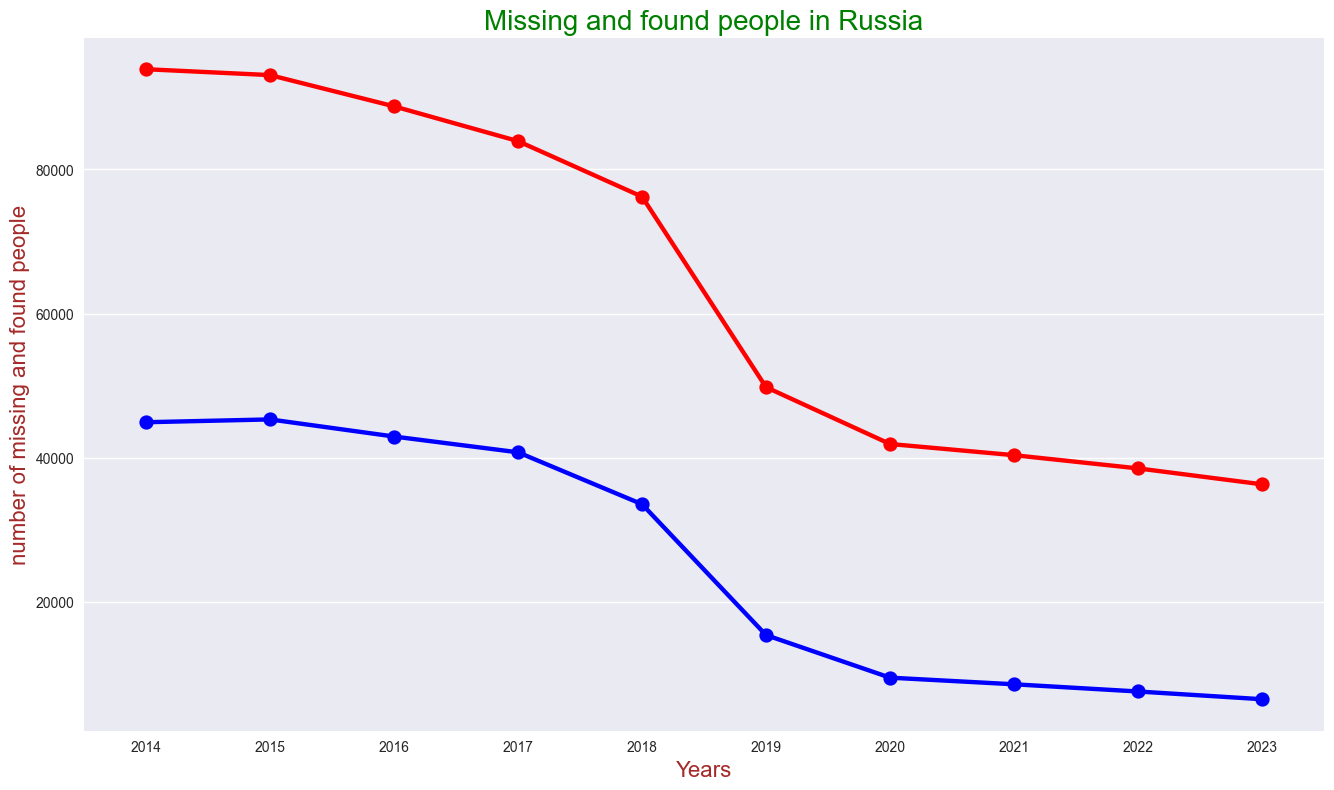

In [521]:
pyplot.figure(figsize=(16,9))
pyplot.title("Missing and found people in Russia",fontsize=20,color="green")
sb.pointplot(x="Year",y="Missing",data=Missing_for_Russia,color="red")
sb.pointplot(x="Year",y="Found",data=Found_for_Russia,color="blue")
pyplot.xlabel("Years", fontsize=16, color="brown")
pyplot.ylabel("number of missing and found people", fontsize=16, color="brown")
plt.show()

In [522]:
total_for_russia = pd.merge(Missing_for_Russia, Found_for_Russia, on="Year")[["Year","Missing","Found"]]
total_for_russia["Мissing and not found in Russia"]=total_for_russia.Missing-total_for_russia.Found
total_for_russia

,Year,Missing,Found,Мissing and not found in Russia
0,2014,93900,44921,48979
1,2015,93085,45311,47774
2,2016,88751,42937,45814
3,2017,83923,40748,43175
4,2018,76217,33545,42672
5,2019,49785,15388,34397
6,2020,41901,9481,32420
7,2021,40349,8561,31788
8,2022,38517,7561,30956
9,2023,36307,6489,29818


<Axes: xlabel='Мissing and not found in Russia', ylabel='Year'>

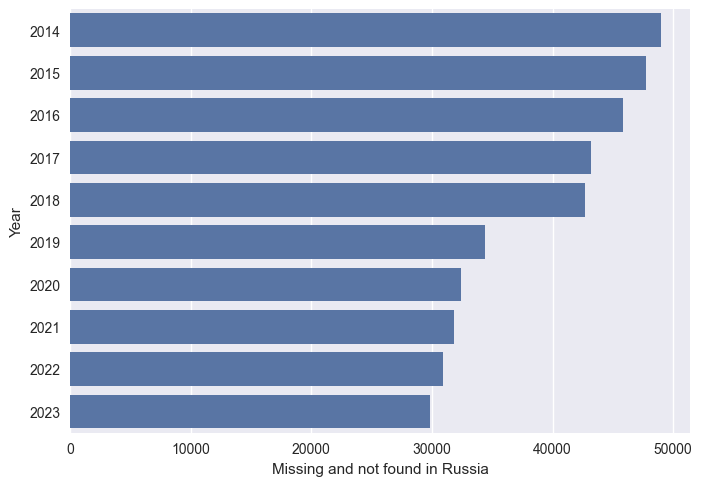

In [523]:
sb.barplot(x="Мissing and not found in Russia", y="Year", data=total_for_russia, orient="y")

In [524]:
total_for_russia["Мissing and not found in Russia"].sum()

387793

In [525]:
missing=df_missing.pivot_table(index="Subject (en)",columns="Year",values="Missing")
missing_regions=missing.drop("Total for Russia")
missing_regions

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Subject (en),,,,,,,,,,
Altai Republic,129.0,99.0,102.0,76.0,90.0,98.0,96.0,94.0,83.0,85.0
Altai region,4467.0,4686.0,4335.0,4430.0,3671.0,526.0,529.0,507.0,497.0,518.0
Amur region,1835.0,2029.0,2092.0,2221.0,2001.0,473.0,412.0,415.0,395.0,400.0
Arkhangelsk region (with AO),2038.0,1928.0,1684.0,1694.0,1464.0,522.0,495.0,482.0,449.0,445.0
Astrakhan Region,1074.0,1046.0,751.0,407.0,358.0,257.0,223.0,208.0,179.0,173.0
...,...,...,...,...,...,...,...,...,...,...
Volgograd region,959.0,1211.0,975.0,706.0,698.0,667.0,598.0,552.0,546.0,538.0
Vologda Region,2131.0,2083.0,1831.0,1892.0,1694.0,384.0,370.0,364.0,356.0,336.0
Voronezh region,1443.0,1655.0,1748.0,1841.0,1402.0,538.0,503.0,527.0,525.0,534.0


In [526]:
found=df_found.pivot_table(index='Subject (en)',columns='Year',values='Found')
found_regions=found.drop('Total for Russia')
found_regions

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Subject (en),,,,,,,,,,
Altai Republic,72.0,37.0,39.0,17.0,32.0,34.0,33.0,27.0,23.0,17.0
Altai region,4016.0,4238.0,3883.0,3981.0,3191.0,75.0,81.0,60.0,37.0,54.0
Amur region,1459.0,1655.0,1728.0,1847.0,1638.0,174.0,126.0,114.0,87.0,94.0
Arkhangelsk region (with AO),1274.0,1150.0,944.0,944.0,760.0,94.0,99.0,89.0,69.0,71.0
Astrakhan Region,520.0,533.0,333.0,57.0,38.0,48.0,28.0,27.0,14.0,11.0
...,...,...,...,...,...,...,...,...,...,...
Volgograd region,305.0,204.0,143.0,102.0,99.0,175.0,116.0,71.0,67.0,72.0
Vologda Region,1657.0,1619.0,1371.0,1455.0,1268.0,94.0,90.0,88.0,87.0,69.0
Voronezh region,1009.0,1251.0,1355.0,1444.0,1007.0,131.0,146.0,176.0,161.0,170.0


In [527]:
missing_regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, Altai Republic to city ​​of Sevastopol
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2014    93 non-null     float64
 1   2015    93 non-null     float64
 2   2016    92 non-null     float64
 3   2017    92 non-null     float64
 4   2018    91 non-null     float64
 5   2019    90 non-null     float64
 6   2020    90 non-null     float64
 7   2021    90 non-null     float64
 8   2022    90 non-null     float64
 9   2023    90 non-null     float64
dtypes: float64(10)
memory usage: 8.0+ KB


In [528]:
missing_regions_10=missing_regions.sort_values(by="2014",ascending=False).head(10)
missing_regions_10

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Subject (en),,,,,,,,,,
Central Federal District,22939.0,21712.0,20815.0,20006.0,17796.0,10992.0,9803.0,9341.0,8876.0,8319.0
Siberian Federal District,19166.0,19046.0,18824.0,17849.0,14064.0,6069.0,5653.0,5494.0,5267.0,5032.0
Privolzhsky federal district,18063.0,17893.0,16547.0,16052.0,15154.0,12054.0,6960.0,6857.0,6599.0,6282.0
Northwest federal district,12195.0,11916.0,11052.0,10205.0,8631.0,4623.0,4488.0,4141.0,3925.0,3729.0
The Urals Federal District,4931.0,4782.0,4619.0,4180.0,4162.0,4102.0,3656.0,3466.0,3151.0,3030.0
Altai region,4467.0,4686.0,4335.0,4430.0,3671.0,526.0,529.0,507.0,497.0,518.0
Republic of Tatarstan,4238.0,4777.0,5023.0,4814.0,4752.0,5116.0,920.0,904.0,886.0,830.0
Moscow region,3950.0,3843.0,3488.0,3150.0,2935.0,2135.0,2043.0,1974.0,1850.0,1814.0
Krasnoyarsk region,3707.0,3743.0,3840.0,3594.0,3149.0,1455.0,1356.0,1355.0,1280.0,1245.0


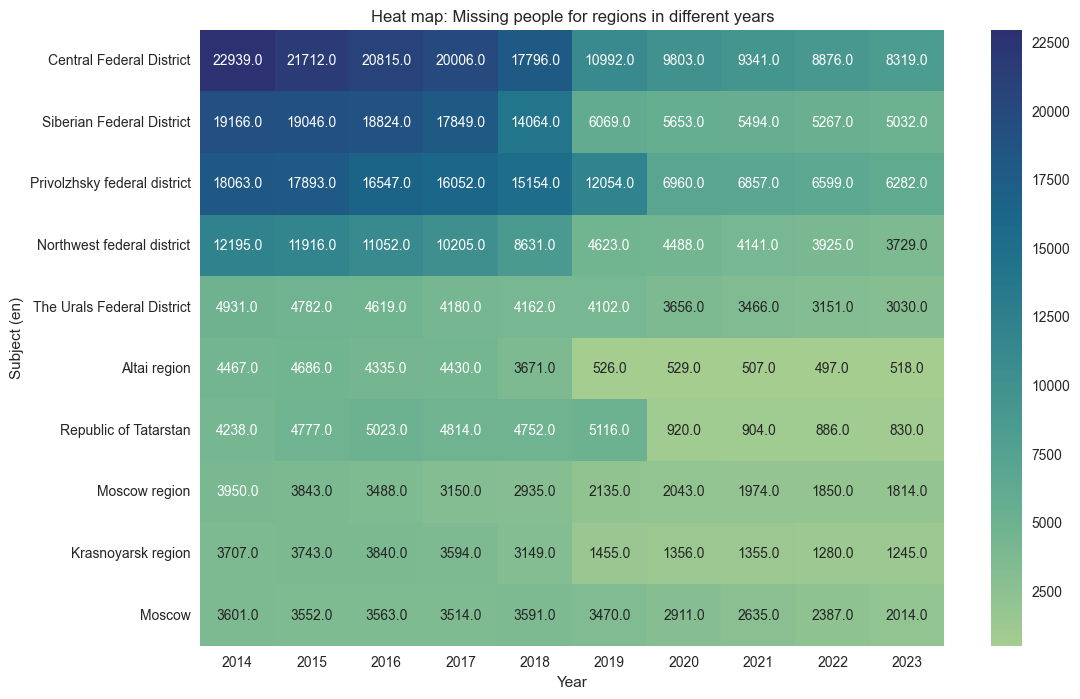

In [529]:
plt.figure(figsize=(12,8))
sb.heatmap(missing_regions_10,annot=True,cmap="crest",fmt=".1f")
plt.title("Heat map: Missing people for regions in different years")
plt.show()

In [530]:
missing_notfound_regions = pd.merge(missing_regions,found_regions,
on = "Subject (en)",
how="left")
missing_notfound_regions.head(1)

Year,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,2020_x,2021_x,2022_x,2023_x,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y
Subject (en),,,,,,,,,,,,,,,,,,,,
Altai Republic,129.0,99.0,102.0,76.0,90.0,98.0,96.0,94.0,83.0,85.0,72.0,37.0,39.0,17.0,32.0,34.0,33.0,27.0,23.0,17.0


In [531]:
missing_notfound_regions["2014"]=missing_notfound_regions["2014_x"]-missing_notfound_regions["2014_y"];
missing_notfound_regions["2015"]=missing_notfound_regions["2015_x"]-missing_notfound_regions["2015_y"];
missing_notfound_regions["2016"]=missing_notfound_regions["2016_x"]-missing_notfound_regions["2016_y"];
missing_notfound_regions["2017"]=missing_notfound_regions["2017_x"]-missing_notfound_regions["2017_y"];
missing_notfound_regions["2018"]=missing_notfound_regions["2018_x"]-missing_notfound_regions["2018_y"];
missing_notfound_regions["2019"]=missing_notfound_regions["2019_x"]-missing_notfound_regions["2019_y"];
missing_notfound_regions["2020"]=missing_notfound_regions["2020_x"]-missing_notfound_regions["2020_y"];
missing_notfound_regions["2021"]=missing_notfound_regions["2021_x"]-missing_notfound_regions["2021_y"];
missing_notfound_regions["2022"]=missing_notfound_regions["2022_x"]-missing_notfound_regions["2022_y"];
missing_notfound_regions["2023"]=missing_notfound_regions["2023_x"]-missing_notfound_regions["2023_y"]


In [532]:
new_columns=["2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]
missing_notfound_regions=missing_notfound_regions[new_columns]

In [533]:
missing_notfound_regions.head(1)

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Subject (en),,,,,,,,,,
Altai Republic,57.0,62.0,63.0,59.0,58.0,64.0,63.0,67.0,60.0,68.0


In [534]:
top_missing_notfound_regions=missing_notfound_regions.sort_values("2014",ascending=False).head(10)
top_missing_notfound_regions

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Subject (en),,,,,,,,,,
Central Federal District,12736.0,12137.0,11521.0,10764.0,10597.0,8461.0,7674.0,7366.0,7024.0,6746.0
Privolzhsky federal district,8287.0,7968.0,7244.0,6922.0,6913.0,5333.0,4952.0,4879.0,4809.0,4752.0
Siberian Federal District,7035.0,6877.0,6672.0,6440.0,5685.0,4457.0,4301.0,4246.0,4151.0,4083.0
Northwest federal district,6502.0,6332.0,6272.0,5562.0,5101.0,3525.0,3300.0,3253.0,3134.0,3077.0
The Urals Federal District,3876.0,3825.0,3725.0,3558.0,3543.0,3096.0,2893.0,2798.0,2668.0,2632.0
Moscow region,3503.0,3448.0,3128.0,2832.0,2691.0,1762.0,1665.0,1611.0,1524.0,1518.0
Moscow,2842.0,2803.0,2787.0,2703.0,2690.0,2535.0,2231.0,2062.0,1868.0,1654.0
GUVD of St. Petersburg. and Len.obl,2569.0,2498.0,2548.0,2138.0,NaN,NaN,NaN,NaN,NaN,NaN
Krasnoyarsk region,1825.0,1776.0,1740.0,1633.0,1637.0,1156.0,1114.0,1086.0,1025.0,990.0


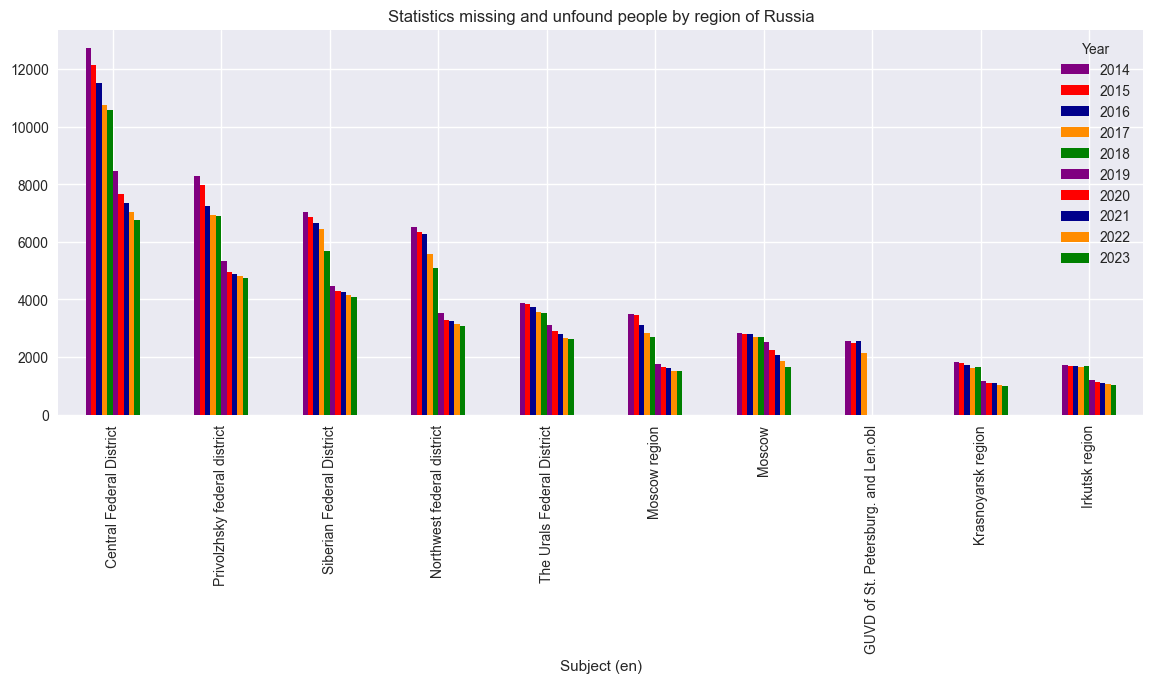

In [535]:
colors=["purple","red","darkblue","darkorange","green"]
top_missing_notfound_regions.plot(
kind="bar",
figsize=(14,5),
title = "Statistics missing and unfound people by region of Russia",
color=colors)
plt.show()

In [536]:
df_migrants=pd.read_csv('C:\\Users\\darko\\Python\\DataSets\\Missing migrants globals\\Missing_Migrants_Global_Figures_allData.csv')  
df_migrants

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14060,2024.MMP0005,2024.MMP0005,Incident,South America,2024-01-06,2024,January,1.0,NaN,1,...,Violence,Venezuela (Bolivarian Republic of),NaN,"Unspecified location in a cave, Presidente Fig...","BNN, The Sun, Gazeta do Povo","-2.048172, -60.027576",South America,"Traveling Circus Performer, ‘Miss Bubblegum’, ...",3.0,https://archive.ph/9rTxC
14061,2024.MMP0006,2024.MMP0006,Incident,Northern Africa,2024-01-07,2024,January,NaN,1.0,1,...,Drowning,Unknown,Western Africa / Atlantic route to the Canary ...,"13 nautical miles south Fuerteventura, Las Pal...","Infobae, Canaria Weekly","27.730817, -14.364792",Uncategorized,Rescatan en aguas próximas a Fuerteventura a u...,1.0,https://archive.ph/CVjiF
14062,2024.MMP0007,2024.MMP0007,Incident,Mediterranean,2024-01-10,2024,January,2.0,9.0,11,...,Drowning,Unknown,Eastern Mediterranean,"10 km North of Mitilini, Lesbos, Greece","InfoMigrants, IOM Greece, Efsyn","39.214156, 26.564986",Uncategorized,At least three dead as migrant boat capsizes n...,4.0,https://archive.ph/lsgsN
14063,2024.MMP0008,2024.MMP0008,Incident,Mediterranean,2024-01-06,2024,January,NaN,3.0,3,...,Drowning,Unknown,Eastern Mediterranean,"In Turkish territorial waters, northeast of th...",Torodami,"36.536554, 28.154434",Uncategorized,Rhodes Shipwreck with 21 refugees and migrants...,1.0,https://archive.ph/4j7RR


In [537]:
df_migrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14065 entries, 0 to 14064
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              14065 non-null  object 
 1   Incident ID                          14065 non-null  object 
 2   Incident Type                        14065 non-null  object 
 3   Region of Incident                   14065 non-null  object 
 4   Website Date                         14050 non-null  object 
 5   Incident year                        14065 non-null  int64  
 6   Reported Month                       14065 non-null  object 
 7   Number of Dead                       13421 non-null  float64
 8   Minimum Estimated Number of Missing  1440 non-null   float64
 9   Total Number of Dead and Missing     14065 non-null  int64  
 10  Number of Survivors                  2339 non-null   float64
 11  Number of Females           

In [538]:
df_migrants_new=df_migrants[["Region of Incident","Website Date","Number of Dead",
    "Total Number of Dead and Missing","Number of Survivors","Number of Females",
    "Number of Males","Number of Children","Region of Origin","Cause of Death",
    "Country of Origin","Location of death","Migration route"]]
df_migrants_new.head()

,Region of Incident,Website Date,Number of Dead,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Location of death,Migration route
0,North America,2014-01-06,1.0,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing
1,North America,2014-01-12,1.0,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing
2,North America,2014-01-14,1.0,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing
3,North America,2014-01-16,1.0,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,"near Douglas, Arizona, USA",US-Mexico border crossing
4,Europe,2014-01-16,1.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,Border between Russia and Estonia,NaN


In [539]:
df_migrants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14065 entries, 0 to 14064
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region of Incident                14065 non-null  object 
 1   Website Date                      14050 non-null  object 
 2   Number of Dead                    13421 non-null  float64
 3   Total Number of Dead and Missing  14065 non-null  int64  
 4   Number of Survivors               2339 non-null   float64
 5   Number of Females                 2751 non-null   float64
 6   Number of Males                   8739 non-null   float64
 7   Number of Children                1670 non-null   float64
 8   Region of Origin                  14064 non-null  object 
 9   Cause of Death                    14065 non-null  object 
 10  Country of Origin                 14057 non-null  object 
 11  Location of death                 14065 non-null  object 
 12  Migr

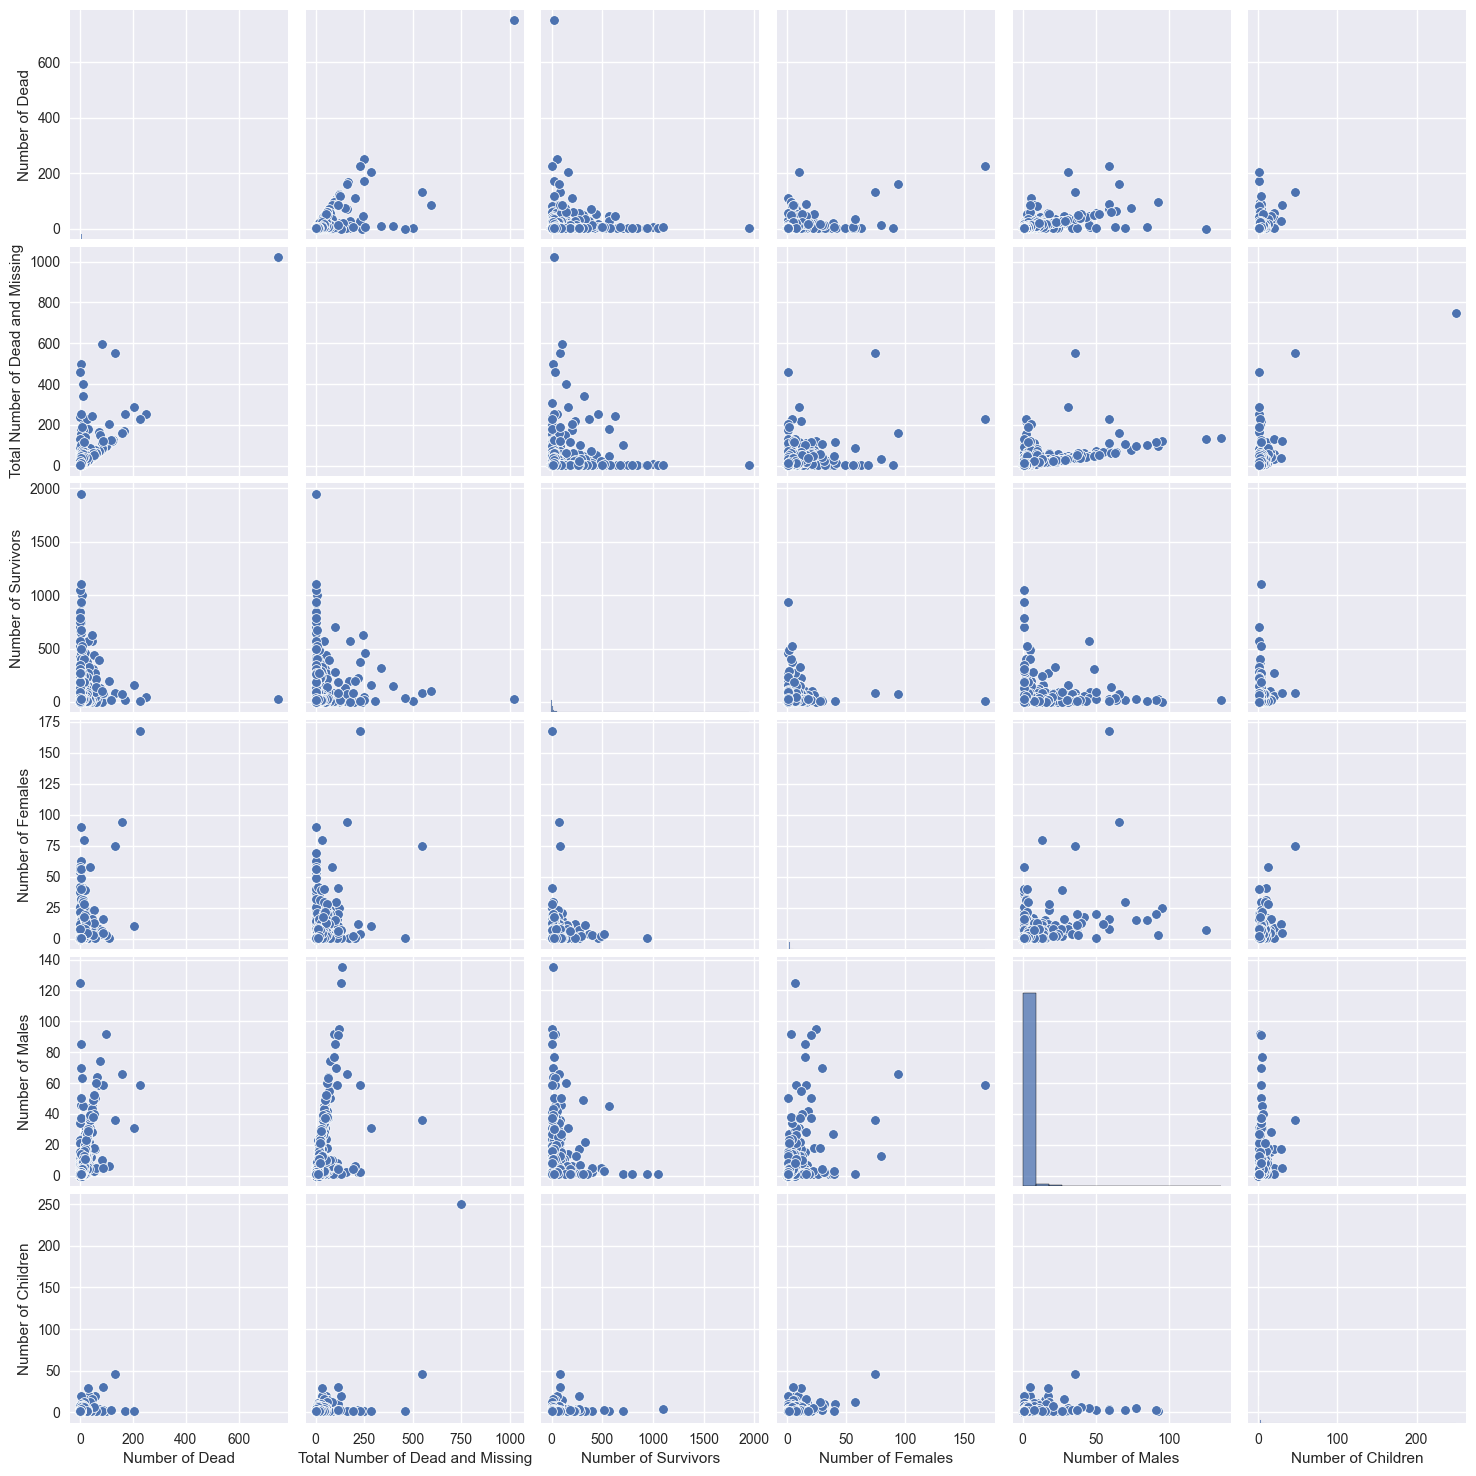

In [540]:
sb.pairplot(df_migrants_new)
plt.show()

In [541]:
df_migrants_new["Region of Incident"].nunique()

16

In [542]:
df_migrants_new["Region of Incident"].unique()

array(['North America', 'Europe', 'Mediterranean', 'Caribbean',
       'South-eastern Asia', 'Southern Asia', 'Eastern Africa',
       'Central America', 'Northern Africa', 'Eastern Asia',
       'Western Asia', 'Western Africa', 'South America',
       'Southern Africa', 'Middle Africa', 'Central Asia'], dtype=object)

In [543]:
df_migrants_new["Region of Origin"].unique()

array(['Central America', 'Latin America / Caribbean (P)',
       'Northern Africa', 'Unknown', 'Southern Asia', 'Caribbean',
       'South-eastern Asia', 'Eastern Africa', 'Europe', 'South America',
       'Western Asia', 'Middle Africa', 'Eastern Asia',
       'Sub-Saharan Africa (P)', 'Western Africa', 'Mixed',
       'Western / Southern Asia (P)', 'Eastern Africa (P)',
       'Western / Southern Asia', 'Eastern Asia (P)',
       'Western Africa (P)', 'Sub-Saharan Africa', nan, 'Oceania',
       'Central Asia', 'Southern Asia (P)', 'Northern Africa (P)',
       'Southern Africa', 'Caribbean (P)', 'Western Asia (P)',
       'South America (P)', 'Central America (P)',
       'South-eastern Asia (P)', 'Northern America', 'Middle Africa (P)'],
      dtype=object)

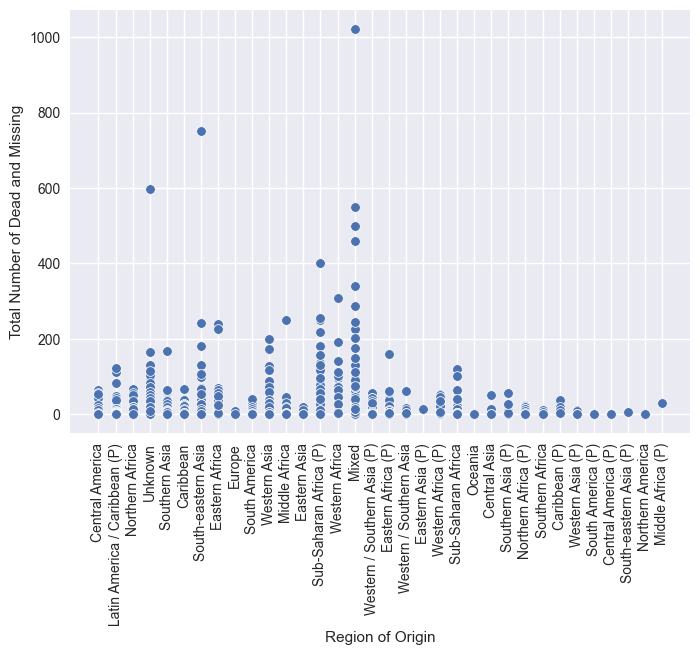

In [544]:
sb.scatterplot(data=df_migrants_new,x="Region of Origin", y="Total Number of Dead and Missing")
plt.xticks(rotation=90)
plt.show()

In [545]:
region_of_origin=df_migrants_new.groupby("Region of Origin")["Total Number of Dead and Missing"].count().sort_values(ascending=False).head(10)
region_of_origin

Region of Origin
Latin America / Caribbean (P)    2397
Southern Asia                    1919
Unknown                          1808
Central America                  1808
Sub-Saharan Africa (P)           1583
Eastern Africa (P)               1137
Northern Africa                   507
Western Asia                      447
Eastern Africa                    421
South America                     385
Name: Total Number of Dead and Missing, dtype: int64

In [546]:
df_migrants_new["Cause of Death"].unique()

array(['Mixed or unknown', 'Violence',
       'Harsh environmental conditions / lack of adequate shelter, food, water',
       'Drowning',
       'Vehicle accident / death linked to hazardous transport',
       'Sickness / lack of access to adequate healthcare',
       'Accidental death', 'Drowning,Mixed or unknown',
       'Drowning,Harsh environmental conditions / lack of adequate shelter, food, water',
       'Drowning,Vehicle accident / death linked to hazardous transport',
       'Harsh environmental conditions / lack of adequate shelter, food, water,Sickness / lack of access to adequate healthcare',
       'Harsh environmental conditions / lack of adequate shelter, food, water,Mixed or unknown',
       'Drowning,Violence',
       'Mixed or unknown,Vehicle accident / death linked to hazardous transport,Violence',
       'Drowning,Sickness / lack of access to adequate healthcare'],
      dtype=object)

In [547]:
df_migrants_new[["Total Number of Dead and Missing","Number of Survivors"]].sum()

Total Number of Dead and Missing    61405.0
Number of Survivors                 94011.0
dtype: float64

In [548]:
df_migrants_new["Website Date"]=pd.to_datetime(df_migrants_new["Website Date"])

C:\Users\darko\AppData\Local\Temp\ipykernel_20372\1311620564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_migrants_new["Website Date"]=pd.to_datetime(df_migrants_new["Website Date"])


In [549]:
df_migrants_new.dtypes

Region of Incident                          object
Website Date                        datetime64[ns]
Number of Dead                             float64
Total Number of Dead and Missing             int64
Number of Survivors                        float64
Number of Females                          float64
Number of Males                            float64
Number of Children                         float64
Region of Origin                            object
Cause of Death                              object
Country of Origin                           object
Location of death                           object
Migration route                             object
dtype: object

In [550]:
df_migrants_new=df_migrants_new.assign(year=df_migrants_new["Website Date"].dt.year,
month=df_migrants_new["Website Date"].dt.month,day=df_migrants_new["Website Date"].dt.day)

In [551]:
df_migrants_new.head(1)

,Region of Incident,Website Date,Number of Dead,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Location of death,Migration route,year,month,day
0,North America,2014-01-06,1.0,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing,2014.0,1.0,6.0


In [552]:
df_migrants_new[["year","month","day"]].dtypes

year     float64
month    float64
day      float64
dtype: object

In [553]:
df_migrants_new["year"]=df_migrants_new["year"].apply(lambda x: '{:.0f}'.format(x))

In [554]:
df_migrants_new["month"]=df_migrants_new["month"].apply(lambda x: '{:.0f}'.format(x))

In [555]:
df_migrants_new["day"]=df_migrants_new["day"].apply(lambda x: '{:.0f}'.format(x))

In [556]:
df_migrants_new[["year","month","day"]].head()

,year,month,day
0,2014,1,6
1,2014,1,12
2,2014,1,14
3,2014,1,16
4,2014,1,16


In [557]:
df_migrants_new["Website Date"]=df_migrants_new["Website Date"].dt.strftime('%d/%m/%Y')

In [558]:
df_migrants_new["Website Date"]

0        06/01/2014
1        12/01/2014
2        14/01/2014
3        16/01/2014
4        16/01/2014
            ...    
14060    06/01/2024
14061    07/01/2024
14062    10/01/2024
14063    06/01/2024
14064    09/01/2024
Name: Website Date, Length: 14065, dtype: object

In [559]:
df_migrants_new.groupby(["year","month"])["Total Number of Dead and Missing"].agg(["sum"])

sum
year month     
2014 1       41
     10     283
     11     117
     12     900
     2       86
...         ...
2023 7      495
     8      818
     9      324
2024 1       21
nan  nan     16

[122 rows x 1 columns]

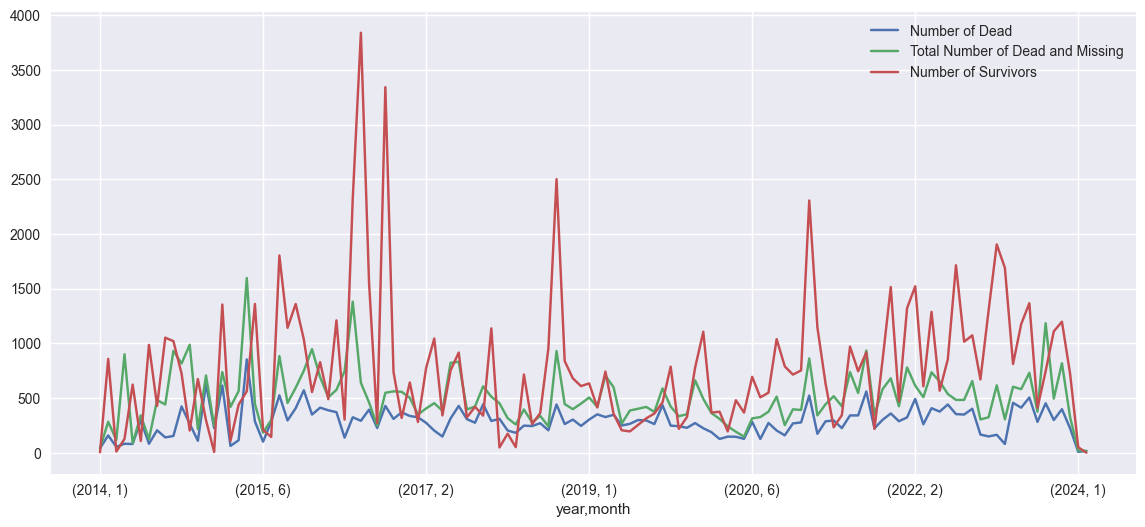

In [560]:
df_migrants_new.groupby(["year","month"]).agg({"Number of Dead":"sum",
"Total Number of Dead and Missing":"sum","Number of Survivors":"sum"}).plot(figsize=(14,6))
plt.show()

In [561]:
migrants_missing=df_migrants_new.groupby(["year"]).agg({"Number of Dead":"sum",
"Total Number of Dead and Missing":"sum"})
migrants_missing

,Number of Dead,Total Number of Dead and Missing
year,,
2014,1980.0,5548
2015,4095.0,6750
2016,4300.0,8084
2017,3726.0,6290
2018,3203.0,5009
2019,3621.0,5417
2020,2340.0,4287
2021,3671.0,6190
2022,4351.0,7132


In [562]:
migrants_missing["Мissing migrants"]=migrants_missing["Total Number of Dead and Missing"]-migrants_missing["Number of Dead"]
migrants_missing

,Number of Dead,Total Number of Dead and Missing,Мissing migrants
year,,,
2014,1980.0,5548,3568.0
2015,4095.0,6750,2655.0
2016,4300.0,8084,3784.0
2017,3726.0,6290,2564.0
2018,3203.0,5009,1806.0
2019,3621.0,5417,1796.0
2020,2340.0,4287,1947.0
2021,3671.0,6190,2519.0
2022,4351.0,7132,2781.0


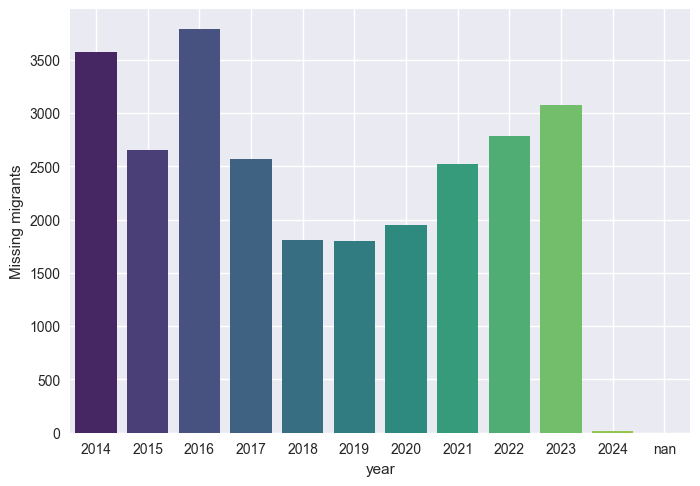

In [563]:
sb.barplot(x="year",y='Мissing migrants',hue="year",palette="viridis",data=migrants_missing,legend=False)
plt.grid(True)
plt.show()

In [564]:
gender=df_migrants_new[["Number of Females","Number of Males","Number of Children"]].sum()
gender

Number of Females      6525.0
Number of Males       15773.0
Number of Children     3240.0
dtype: float64

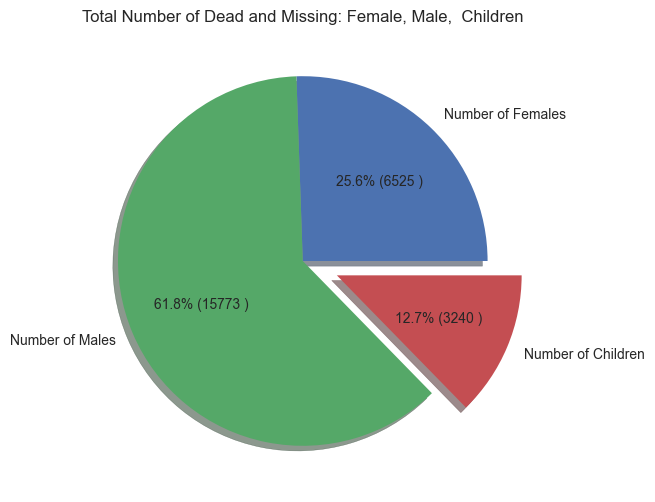

In [565]:
plt.figure(figsize=(6,6))
plt.style.use("seaborn-v0_8")
plt.pie(gender
,labels=gender.index
,autopct=lambda p: "{:.1f}% ({:.0f} )".format(p, p*sum(gender)/100)
,explode=(0,0,0.2)
,shadow=True)
plt.title("Total Number of Dead and Missing: Female, Male,  Children")
plt.show()

In [566]:
df_migrants_new.groupby("Cause of Death")["Number of Dead"].sum().sort_values(ascending=False).head(6)

Cause of Death
Drowning                                                                  13051.0
Mixed or unknown                                                           6748.0
Vehicle accident / death linked to hazardous transport                     5342.0
Violence                                                                   3978.0
Harsh environmental conditions / lack of adequate shelter, food, water     3211.0
Sickness / lack of access to adequate healthcare                           1585.0
Name: Number of Dead, dtype: float64

In [567]:
cause_of_death=df_migrants_new["Cause of Death"].isin(["Drowning","Mixed or unknown",
"Vehicle accident / death linked to hazardous transport","Violence",
"Harsh environmental conditions / lack of adequate shelter, food, water",
"Sickness / lack of access to adequate healthcare"])
cause_of_death=df_migrants_new[cause_of_death]

In [568]:
cause_of_death["Cause of Death"].replace({"Vehicle accident / death linked to hazardous transport":"Vehicle accident",
"Harsh environmental conditions / lack of adequate shelter, food, water":"Harsh environmental conditions","Sickness / lack of access to adequate healthcare":"Sickness"},inplace=True)

C:\Users\darko\AppData\Local\Temp\ipykernel_20372\3594083383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cause_of_death["Cause of Death"].replace({"Vehicle accident / death linked to hazardous transport":"Vehicle accident",


In [569]:
cause_of_death.head()

,Region of Incident,Website Date,Number of Dead,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Location of death,Migration route,year,month,day
0,North America,06/01/2014,1.0,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing,2014,1,6
1,North America,12/01/2014,1.0,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing,2014,1,12
2,North America,14/01/2014,1.0,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,Pima Country Office of the Medical Examiner ju...,US-Mexico border crossing,2014,1,14
3,North America,16/01/2014,1.0,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,"near Douglas, Arizona, USA",US-Mexico border crossing,2014,1,16
4,Europe,16/01/2014,1.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions,Sudan,Border between Russia and Estonia,NaN,2014,1,16


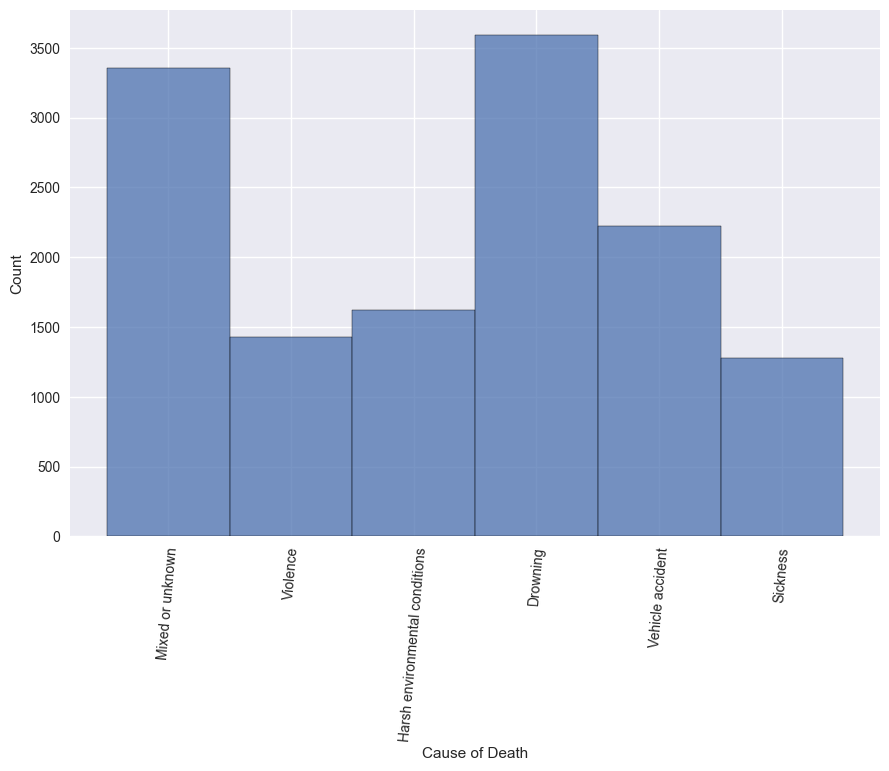

In [570]:
sb.displot(cause_of_death,x="Cause of Death",height=6,aspect=1.5)
plt.xticks(rotation=85)
plt.show()

In [571]:
df_migrants_new["Migration route"].unique()

array(['US-Mexico border crossing', nan, 'Eastern Mediterranean',
       'English Channel to the UK', 'Caribbean to US',
       'Western Mediterranean', 'Central Mediterranean',
       'Haiti to Dominican Republic', 'Eastern Route to/from EHOA',
       'Route to Southern Africa', 'Sahara Desert crossing',
       'Western Africa / Atlantic route to the Canary Islands',
       'Syria to Türkiye', 'Western Balkans', 'Türkiye-Europe land route',
       'Dominican Republic to Puerto Rico', 'Northern Route from EHOA',
       'Horn of Africa Route', 'Sea crossings to Mayotte', 'Darien',
       'Venezuela to Caribbean', 'Iran to Türkiye', 'Italy to France',
       'Afghanistan to Iran', 'DRC to Uganda',
       'Central Mediterranean,US-Mexico border crossing',
       'Central Mediterranean,Sahara Desert crossing',
       'Belarus-EU border', 'Ukraine to Europe',
       'Caribbean to Central America'], dtype=object)

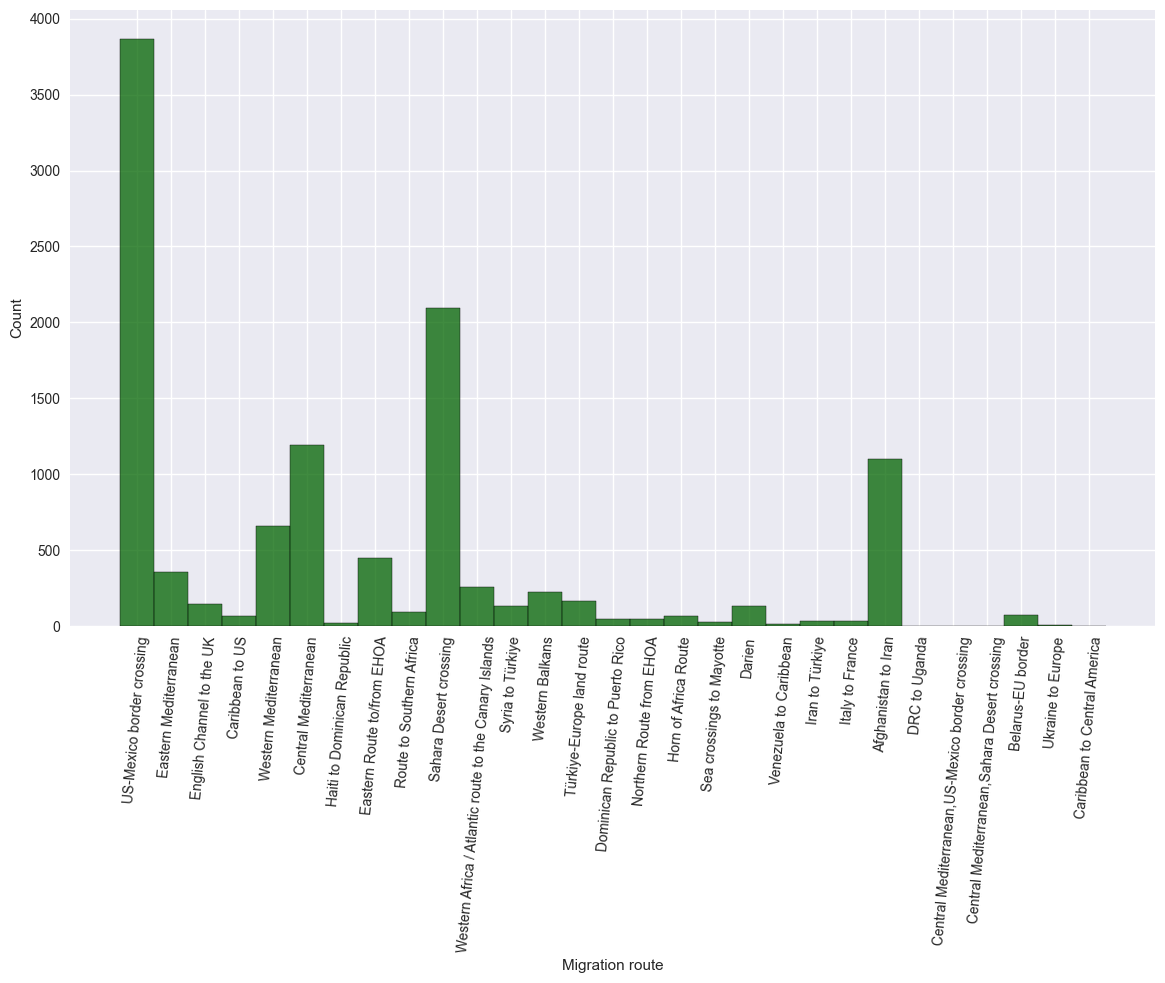

In [572]:
plt.figure(figsize=(14,8))
sb.histplot(data=df_migrants_new,x="Migration route",bins=42,color="darkgreen")
plt.xticks(rotation=85)
plt.show()

In [573]:
df_migrants_new["Number of Children"].nlargest(10)

253      250.0
1827      46.0
12814     30.0
3344      29.0
1086      20.0
1894      20.0
5061      20.0
8914      16.0
913       15.0
3568      15.0
Name: Number of Children, dtype: float64

In [574]:
df_migrants_new.loc[[253,1827,12914,3344,1086,1894,6061,8914,913,3568]]

,Region of Incident,Website Date,Number of Dead,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Location of death,Migration route,year,month,day
253,South-eastern Asia,31/12/2014,NaN,750,NaN,NaN,NaN,250.0,South-eastern Asia,Mixed or unknown,Unknown,"Departed from Arakan, Myanmar. Vast majority g...",NaN,2014,12,31
1827,Mediterranean,26/05/2016,133.0,550,87.0,75.0,36.0,46.0,Mixed,Drowning,"Côte d'Ivoire,Eritrea,Gambia,Nigeria,Somalia,S...","35 nautical miles north of Zuwara, Libya",Central Mediterranean,2016,5,26
12914,Europe,07/04/2023,1.0,1,NaN,NaN,1.0,NaN,Southern Asia,Harsh environmental conditions / lack of adequ...,India,"On the Dysna river, Ignalina, Lithuania",Belarus-EU border,2023,4,7
3344,Western Asia,09/08/2017,29.0,35,85.0,12.0,17.0,29.0,Eastern Africa,Drowning,Ethiopia,"Off the coast of Shabwa, Hadhramaut Governorat...",Eastern Route to/from EHOA,2017,8,9
1086,Mediterranean,28/10/2015,57.0,56,274.0,7.0,17.0,20.0,Western / Southern Asia (P),Drowning,Unknown,"Found on beaches in Lesvos,north of Lesvos, Gr...",Eastern Mediterranean,2015,10,28
1894,Western Africa,12/06/2016,34.0,34,NaN,9.0,5.0,20.0,Sub-Saharan Africa (P),Harsh environmental conditions / lack of adequ...,"Niger,Unknown","Desert near Assamaka, Niger near border with A...",Sahara Desert crossing,2016,6,12
6061,Northern Africa,21/04/2019,1.0,1,NaN,1.0,NaN,NaN,Eastern Africa (P),Mixed or unknown,Unknown,"Unspecified location in the Sahara desert, Sudan",Sahara Desert crossing,2019,4,21
8914,Eastern Africa,12/04/2021,44.0,44,14.0,16.0,28.0,16.0,Eastern Africa,Drowning,Ethiopia,Unspecified location off the coast of Djibouti...,Eastern Route to/from EHOA,2021,4,12
913,Mediterranean,13/09/2015,34.0,38,99.0,15.0,15.0,15.0,Western Asia,Drowning,"Iraq,Syrian Arab Republic",Near Farmakonisi,Eastern Mediterranean,2015,9,13
3568,South-eastern Asia,28/09/2017,23.0,63,17.0,7.0,1.0,15.0,Southern Asia,Drowning,Myanmar,"Bay of Bengal, off the coast of Shamlapur, Ukh...",NaN,2017,9,28


In [575]:
df_diamonds=sb.load_dataset("diamonds")
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [576]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [577]:
df_diamonds[["price"]].max()

price    18823
dtype: int64

In [578]:
df_diamonds["price"].mean()

3932.799721913237

In [579]:
df_diamonds["cut"].value_counts().get("Ideal")

21551

In [580]:
df_diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [581]:
premium_diamonds=df_diamonds[df_diamonds["cut"]=="Premium"]
premium_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [582]:
premium_diamonds["carat"].mean()

0.8919548981219638

In [583]:
df_diamonds.groupby("cut")["carat"].mean()

C:\Users\darko\AppData\Local\Temp\ipykernel_20372\543592611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.groupby("cut")["carat"].mean()


cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

In [584]:
df_diamonds.groupby("color")["price"].mean()

C:\Users\darko\AppData\Local\Temp\ipykernel_20372\4214154361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.groupby("color")["price"].mean()


color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64